In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


In [21]:
df = pd.read_excel('./Варіанти.xlsx')

In [24]:
points = df[['X', 'Y']].to_numpy()

In [2]:
dots = np.array([
    [4, 2], 
    [4.5, 2.5], 
    [5, 3.5], 
    [6, 4], 
    [7, 4], 
    [7.5, 3.5], 
    [7.5, 2.5], 
    [7, 2], 
    [4, 2]  
])


In [26]:
def plots(dots): 
    plt.plot(dots[:, 0], dots[:, 1], ".-",0, 0)

    plt.grid()
    plt.show()

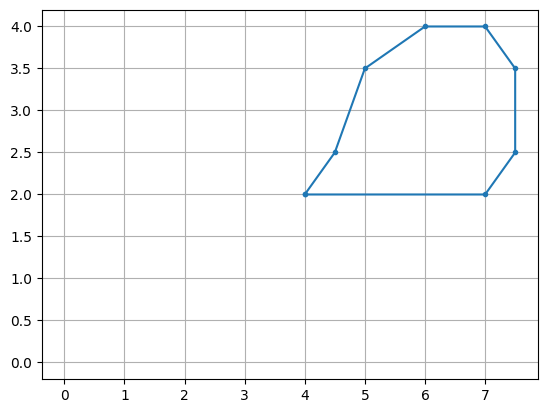

In [27]:
plots(dots)

In [14]:
def plots_2(dots):
    dot = np.mean(dots, axis=0)

    scale_matrix = np.array([[2/3, 0], 
                            [0, 2/3]])

    matrix_result = (dots - dot) @ scale_matrix + dot 

    plt.figure(figsize=(8, 8))
    plt.plot(dots[:, 0], dots[:, 1], 'o-', label='Original', markersize=8)
    plt.plot(matrix_result[:, 0], matrix_result[:, 1], 'o-', label='Result', markersize=8)


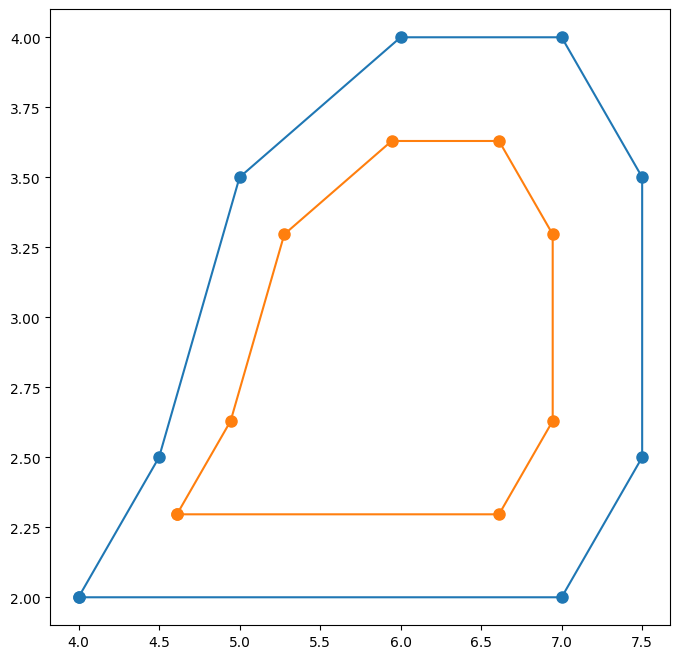

In [15]:
plots_2(dots)

In [34]:
def plots_3(dots):

    result_reverse = np.zeros_like(dots)

    for i in range(dots.shape[0]):
        result_reverse[i] = dots[i] * np.matrix([[-1, 0], [0, -1]])
        
    plt.plot(result_reverse[:, 0], result_reverse[:, 1], ".-", [-3, 3], [0, 0], "b")
    plt.plot(dots[:, 0], dots[:, 1], ".-", [0, 0], [-3, 3], "b")


    plt.grid()
    plt.show()

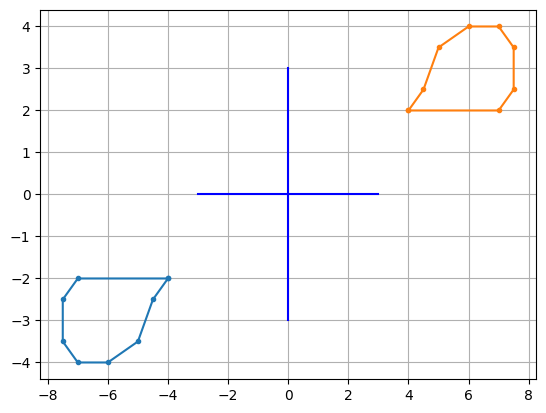

In [35]:
plots_3(dots)

In [18]:
def plots_4(dots):
    first, second = [0, 7], [1, 8]
    dotsn = np.array([[first[0], second[0]], [first[1], second[1]]])

    k = (second[1] - second[0]) / (first[1] - first[0])
    b = second[0] - first[0] * k
    phi = np.arctan(k)

    dots_3d = np.column_stack((dots, np.ones(dots.shape[0])))
    dots_sym = np.zeros_like(dots_3d)


    def plot(dots_sym, state=''):
        plt.plot([-6, 6], [0, 0], "b")
        plt.plot([0, 0], [-6, 6], "b")
        plt.plot(first, second, "r", label="Задана пряма")

        plt.plot(dots[:, 0], dots[:, 1], ".-", label="Початковий 8-кутник")
        plt.plot(dots_sym[:, 0], dots_sym[:, 1], ".-", label="Результат перетворення")
        plt.grid()
        plt.title("Симетричне відображення 8-кутника відносно прямої " + state)
        plt.legend()
        plt.axis('equal')
        plt.show()

    T1 = np.matrix([[1, 0, 0], 
                    [0, 1, 0], 
                    [0, -b, 1]])

    for i in range(dots_sym.shape[0]):
        dots_sym[i] = dots_3d[i] @ T1
    plot(dots_sym, 'Після зсуву по осі Y на -b')

    T2 = np.matrix([[np.cos(-phi), np.sin(-phi), 0], 
                    [-np.sin(-phi), np.cos(-phi), 0], 
                    [0, 0, 1]])

    for i in range(dots_sym.shape[0]):
        dots_sym[i] = dots_sym[i] @ T2
    plot(dots_sym, 'Після повороту на кут -φ')

    T3 = np.matrix([[1, 0, 0], 
                    [0, -1, 0], 
                    [0, 0, 1]])

    for i in range(dots_sym.shape[0]):
        dots_sym[i] = dots_sym[i] @ T3
    plot(dots_sym, 'Після відображення відносно осі X')

    T4 = np.matrix([[np.cos(phi), np.sin(phi), 0], 
                    [-np.sin(phi), np.cos(phi), 0], 
                    [0, 0, 1]])

    for i in range(dots_sym.shape[0]):
        dots_sym[i] = dots_sym[i] @ T4
    plot(dots_sym, 'Після повороту на кут φ')

    T5 = np.matrix([[1, 0, 0], 
                    [0, 1, 0], 
                    [0, b, 1]])

    for i in range(dots_sym.shape[0]):
        dots_sym[i] = dots_sym[i] @ T5
    plot(dots_sym, 'Після зсуву по осі Y на b')

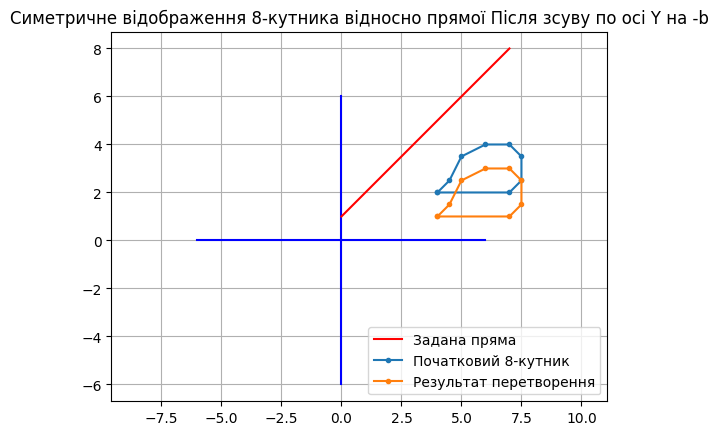

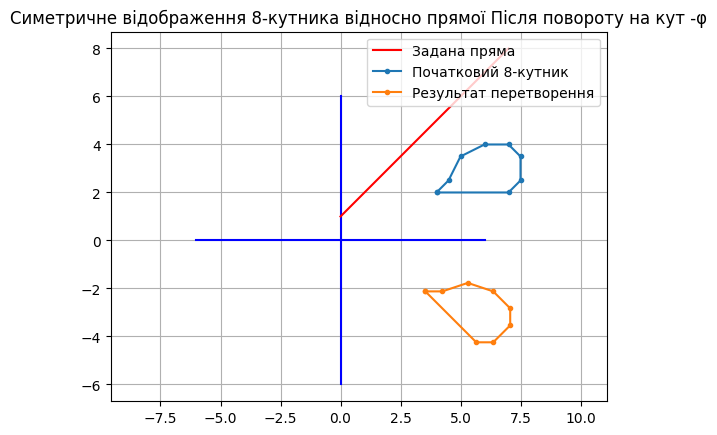

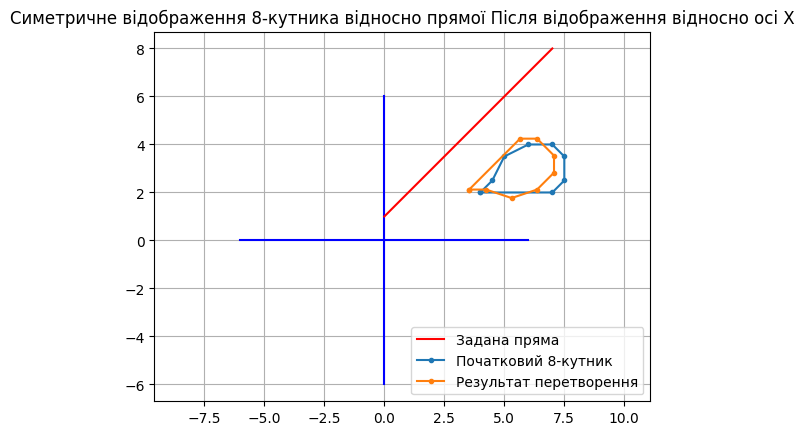

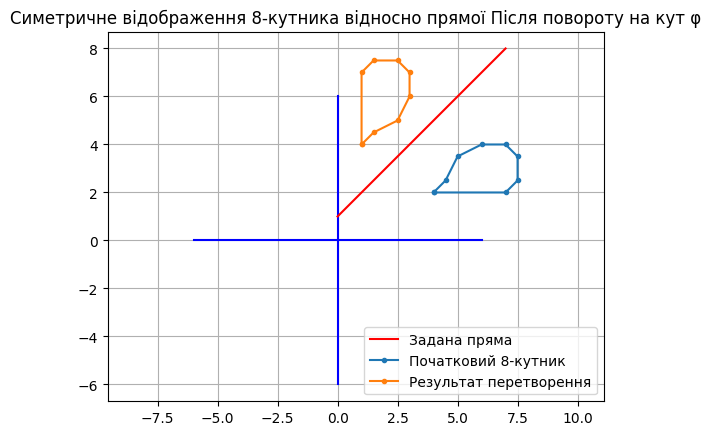

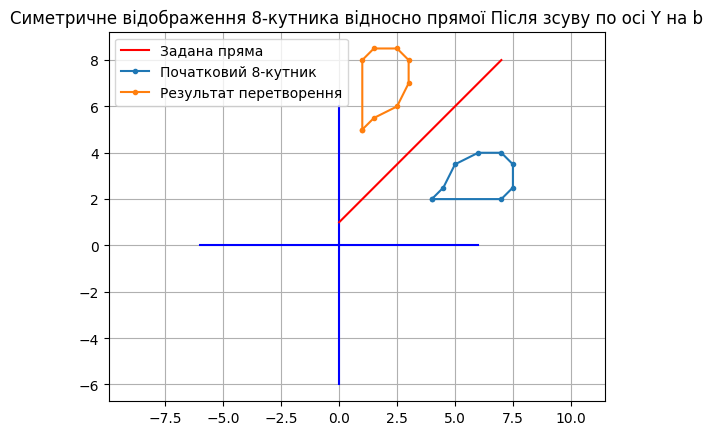

In [19]:
plots_4(dots)

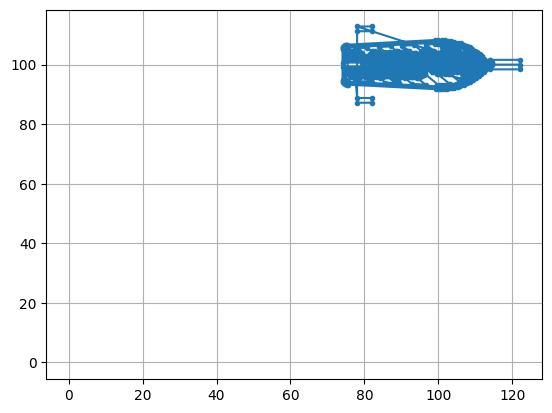

In [28]:
plots(points)

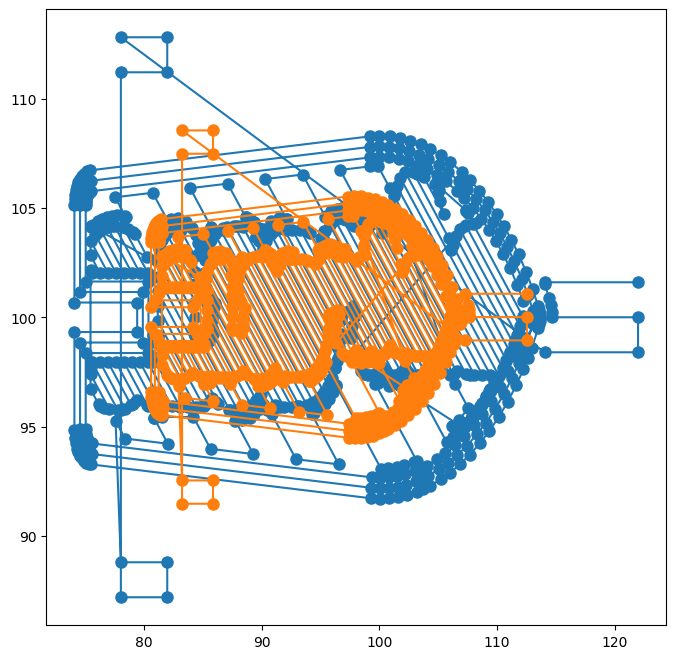

In [30]:
plots_2(points)

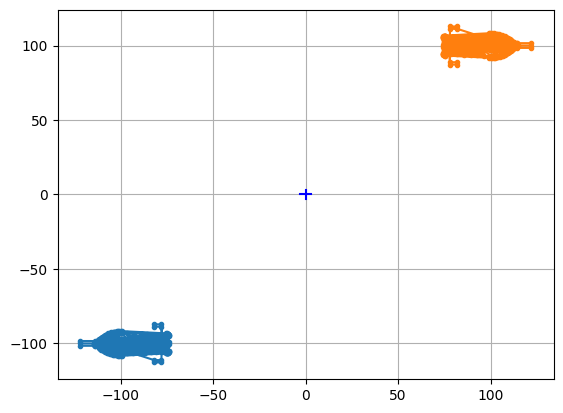

In [36]:
plots_3(points)

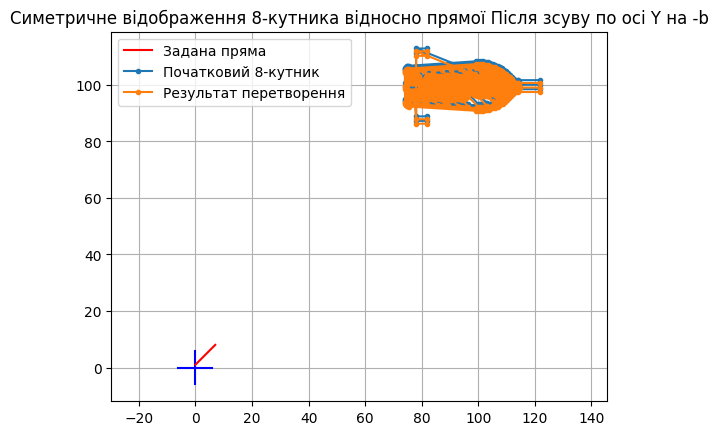

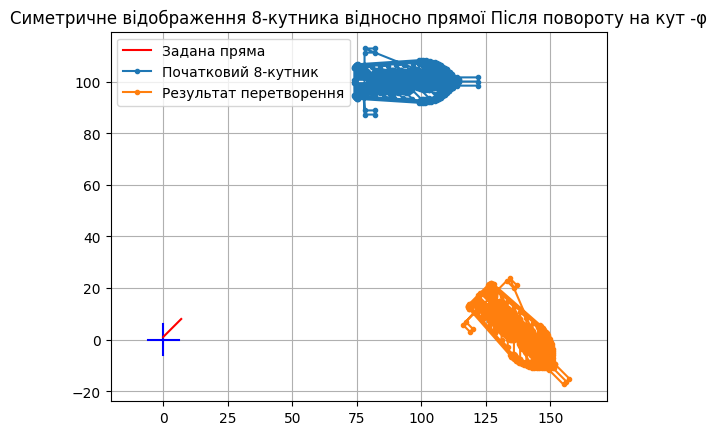

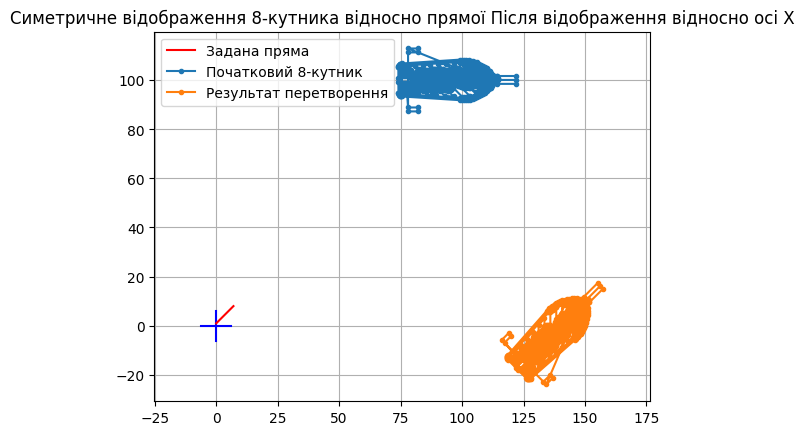

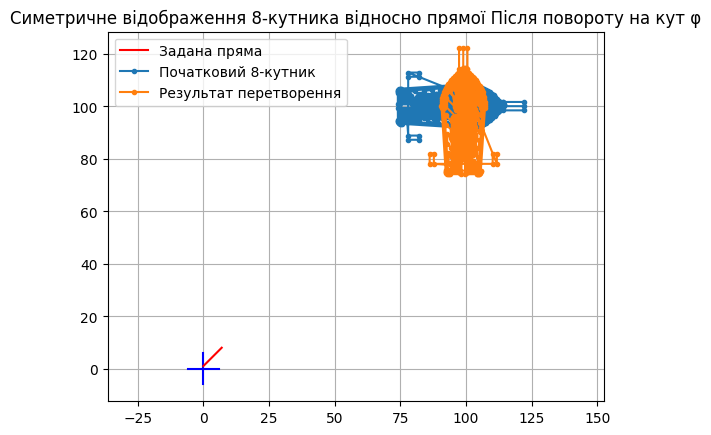

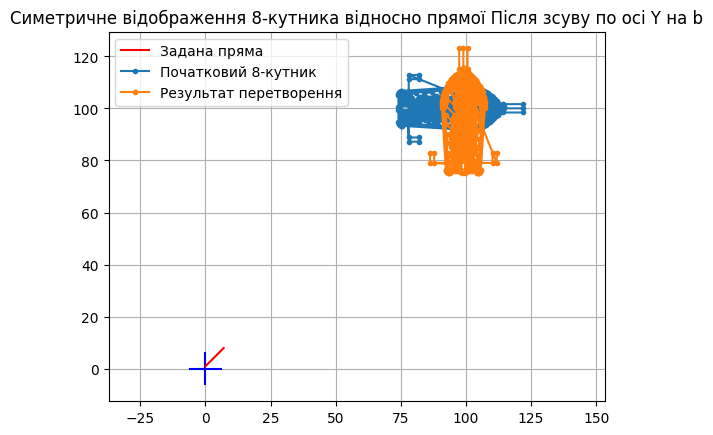

In [37]:
plots_4(points)